In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import requests
#from bs4 import BeautifulSoup

#from tqdm import trange

import time
import calendar

#from tqdm import tqdm

In [627]:
class Scraper():

    def __init__(self, url = 'https://www.wmata.com/service/daily-report/daily-service-report.cfm?id='):
        self.url = url

    def load_page(self, i):
        page = requests.get(self.url + str(i), verify=False)
        soup = BeautifulSoup(page.content, 'html.parser')
        return page, soup

    def get_incidents(self, i):
        df = pd.DataFrame(columns = ['date','text'])
        page, soup = self.load_page(i)
        j = 0
        for entry in soup.find(class_ = 'cs_control CS_Element_Custom').decode_contents().split('<p>'):
            if '<br/>' in entry:
                for element in [item for sublist in [e.split('\\n') for e in entry.replace('\t', ' ').split('<br/>')] for item in sublist]:
                    try:
                        if ':' in element and np.logical_or('a.m.' in element[:20], 'p.m' in element[:20]):
                            event_date = pd.to_datetime(str(date) + ' ' + ' '.join(element.replace('\\n','').replace('\\r','').split(' ')[:2]))
                            event_text =  ' '.join(element.strip('\n').split(' ')[2:])
                            df.loc[j] = [event_date, event_text]
                            j += 1
                        if 'day,'  in element and '<h3>' in element:
                            date = pd.to_datetime(BeautifulSoup(element, 'html.parser').find_all('h3')[0].contents[0].split('Daily Service Report for ')[1])
                    except:
                        print('Error. Details:')
                        print('i = ' + str(i))
                        print('Problematic text: ' + element)
                        pass

            else: 
                if ':' in entry and np.logical_or('a.m.' in entry[:20], 'p.m' in entry[:20]):
                    event_date = pd.to_datetime(str(date) + ' ' + ' '.join(entry.replace('\\n','').replace('\\r','').replace('\t', ' ').replace('\n', '').split(' ')[:2]))
                    event_text =  ' '.join(entry.strip('\\n').split(' ')[2:])
                    df.loc[j] = [event_date, event_text]
                    j += 1
                if 'day,'  in entry and '<h3>' in entry:
                    date = pd.to_datetime(BeautifulSoup(entry, 'html.parser').find_all('h3')[0].contents[0].split('Daily Service Report for ')[1])
        return df

In [628]:
scraper = Scraper()

In [629]:
scraper.get_incidents(i = i)

,date,text
0,2017-12-30 18:46:00,A Shady Grove-bound Red Line train at Medical\...
1,2017-12-30 21:00:00,A New Carrollton-bound Orange Line train at\nV...


In [385]:
import urllib3
urllib3.disable_warnings()


In [622]:
df_tmp = pd.DataFrame(columns = ['date','text'])
page, soup = scraper.load_page(i)
j = 0
for entry in soup.find(class_ = 'cs_control CS_Element_Custom').decode_contents().split('<p>'):
    if '<br/>' in entry:
        for element in [item for sublist in [e.split('\\n') for e in entry.replace('\t', ' ').split('<br/>')] for item in sublist]:
            try:
                if ':' in element and np.logical_or('a.m.' in element[:20], 'p.m' in element[:20]):
                    event_date = pd.to_datetime(str(date) + ' ' + ' '.join(element.replace('\\n','').replace('\\r','').split(' ')[:2]))
                    event_text =  ' '.join(element.strip('\n').split(' ')[2:])
                    df_tmp.loc[j] = [event_date, event_text]
                    j += 1
                if 'day,'  in element and '<h3>' in element:
                    date = pd.to_datetime(BeautifulSoup(element, 'html.parser').find_all('h3')[0].contents[0].split('Daily Service Report for ')[1])
            except:
                print('Error. Details:')
                print('i = ' + str(i))
                print('Problematic text: ' + element)
                pass

    else: 
        if ':' in entry and np.logical_or('a.m.' in entry[:20], 'p.m' in entry[:20]):
            event_date = pd.to_datetime(str(date) + ' ' + ' '.join(entry.replace('\\n','').replace('\\r','').replace('\t', ' ').replace('\n', '').split(' ')[:2]))
            event_text =  ' '.join(entry.strip('\\n').split(' ')[2:])
            df_tmp.loc[j] = [event_date, event_text]
            j += 1
        if 'day,'  in entry and '<h3>' in entry:
            date = pd.to_datetime(BeautifulSoup(entry, 'html.parser').find_all('h3')[0].contents[0].split('Daily Service Report for ')[1])


In [623]:
df_tmp

,date,text
0,2017-12-30 18:46:00,A Shady Grove-bound Red Line train at Medical\...
1,2017-12-30 21:00:00,A New Carrollton-bound Orange Line train at\nV...


In [591]:
.split('Daily Service Report for ')[0].find_all('h3')[0].contents[0]

TypeError: 'NoneType' object is not callable

In [559]:
soup.find_all('p')

[<p>After-Hours Commuter Service Pilot Program</p>,
 <p>New: Personalized bus timetables</p>,
 <p>View real-time train locations</p>,
 <p>It's go time. Tap and go time.</p>,
 <p>Keeping Metro Safe, Reliable and Affordable</p>,
 <p>Save $$$ with SmartBenefits®</p>,
 <p>Now Hiring: Metrobus Drivers</p>,
 <p>Search for transportation near you</p>,
 <p>Search for transportation near you</p>,
 <p class="small-text"><a href="/about/records/privacy.cfm">Metro's privacy policy</a></p>,
 <p>
 TRAVEL INFORMATION <br/>
 <a href="tel:+1-202-637-7000">202.637.7000</a>
 </p>,
 <p>
 TTY<br/>
 <a href="tel:+1-202-962-2033">202.962.2033</a>
 </p>,
 <p>
 TRANSIT POLICE <br/>
 <a href="tel:+1-202-962-2121">202.962.2121</a>
 </p>,
 <p>
 TEXT:<br/><a href="sms:696873">MYMTPD (696873)</a>
 </p>,
 <p>
 CUSTOMER RELATIONS <br/>
 <a href="tel:+1-202-637-1328">202.637.1328</a>
 </p>,
 <p>
 CUSTOMER SUPPORT: <br>SMARTRIP &amp; SMARTBENEFITS
 <a href="tel:+1-888-762-7874">888.762.7874</a> (M—F, 7 am—8 pm)
 </br><

In [417]:
for element in [item for sublist in [e.split('\\n') for e in entry.replace('\t', ' ').split('<br/>')] for item in sublist]:
    print(element)
    if ':' in element and np.logical_or('a.m.' in element[:20], 'p.m' in element[:20]):
        event_date = pd.to_datetime(str(date) + ' ' + ' '.join(element.replace('\\n','').replace('\\r','').split(' ')[:2]))
        event_text =  ' '.join(element.strip('\n').split(' ')[2:])
        df.loc[j] = [event_date, event_text]
        print(event_date, event_text)

        i += 1
    if 'day,'  in element and '<h3>' in element:
        date = pd.to_datetime(element.split('<h3>')[1].strip('</h3>\n'))


NOTE: Metrobus information will be added to these reports once new bus technology systems are functional, when Metro can collect and report ridership and service information comparable to that for Metrorail. 

Percentage of Riders who experienced no delay: 97.47 percent 

Service Disruptions: 

7:03 a.m. An inbound Yellow Line train at Huntington experienced mechanical difficulties and was dispatched late. Trains were re-scheduled to maintain regular intervals between trains. 
2005-07-08 07:03:00 An inbound Yellow Line train at Huntington experienced mechanical difficulties and was dispatched late. Trains were re-scheduled to maintain regular intervals between trains. 

7:45 a.m. An inbound Red Line train at Rockville reported a mechanical problem, and the train was off-loaded. 
2005-07-08 07:45:00 An inbound Red Line train at Rockville reported a mechanical problem, and the train was off-loaded. 

7:45 a.m. An inbound Blue Line train at Capitol Heights reported a problem with the door

In [497]:
#df = pd.DataFrame(columns = ['date','text'])

for i in trange(13, 3781):
    df_temp = scraper.get_incidents(i = i)
    df = pd.concat([df, df_temp], axis = 0)
    time.sleep(1)

  6%|███▉                                                            | 235/3768 [07:44<1:53:37,  1.93s/it]/var/folders/95/6fbcjzp92yxgjjtbwjvbgqgd4mssdk/T/ipykernel_52415/2298363174.py:22: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df.loc[j] = [event_date, event_text]
 25%|███████████████▋                                                | 925/3768 [28:50<1:22:56,  1.75s/it]

Error. Details:
i = 938
Problematic text: 1239 a.m. an outbound Green Line train at Suitland was off-loaded due to a report of a suspicious package.  Customers exited the train and the station while the report was investigated.  Police checked the station and the train, deeming them safe to continue operations.  The station was re-opened at 12:58 a.m.   


 44%|███████████████████████████▊                                   | 1665/3768 [51:51<1:01:50,  1.76s/it]

Error. Details:
i = 1682
Problematic text: 
9:41p.m. A Red Line train at Gallery Place in the direction of Shady Grove was taken out of service because of a door problem, and customers were required to exit the train.    


 44%|███████████████████████████▉                                   | 1672/3768 [52:06<1:08:31,  1.96s/it]

Error. Details:
i = 1687
Problematic text: 
1:11p.m. An Orange Line train at West Falls Church in the direction of New Carrollton was taken out of service because of a door problem, and customers were required to exit the train.    


 51%|█████████████████████████████████▏                               | 1926/3768 [59:52<53:39,  1.75s/it]

Error. Details:
i = 1956
Problematic text: 
7: 20 p.m. A Red Line train at Friendship Heights outbound to Bethesda delayed due to track problem.    


 51%|████████████████████████████████▎                              | 1934/3768 [1:00:06<53:14,  1.74s/it]

Error. Details:
i = 1964
Problematic text: 
7: 28 p.m. A Blue Line train at Stadium Armory outbound to Benning Road overran station by two doors.    


 55%|██████████████████████████████████▉                            | 2090/3768 [1:05:17<55:24,  1.98s/it]

Error. Details:
i = 2124
Problematic text: 
10: 25 p.m. A Shady Grove-bound Red Line Train at Farragut North was delayed 4 minutes due to a door problem.    


 55%|██████████████████████████████████▉                            | 2091/3768 [1:05:19<55:28,  1.98s/it]

Error. Details:
i = 2104
Problematic text: From 5:20 a.m. until 12:45 p.m. Red Line trains were single tracked between Silver Spring and Takoma due to a problem with a section of third rail. Customers experienced delays up to 15 minutes in both directions during the morning rush hour. After 9 a.m., trains experienced 5-10 minute delays.    


 58%|████████████████████████████████████▏                          | 2168/3768 [1:08:08<46:47,  1.75s/it]

Error. Details:
i = 2194
Problematic text: 
5:57 p.m.A Vienna-bound Orange Line train at Rosslyn was offloaded due to a brake problem. Customers experienced a 9-minute delay.    


 59%|████████████████████████████████████▉                          | 2208/3768 [1:09:20<48:42,  1.87s/it]

Error. Details:
i = 2238
Problematic text: 
8: 25 p.m. A Branch Avenue-bound Green Line train at West Hyattsville was delayed 5 minutes due to an operational problem.     


 60%|█████████████████████████████████████▊                         | 2260/3768 [1:10:57<43:36,  1.74s/it]

Error. Details:
i = 2290
Problematic text: 
9: 18 p.m. A Largo Town Center-bound Blue Line train at L’Enfant Plaza was delayed 5 minutes due to a door problem.     


 73%|█████████████████████████████████████████████▉                 | 2749/3768 [1:26:06<29:57,  1.76s/it]

Error. Details:
i = 2774
Problematic text: 
6:10p.m. A Greenbelt-bound Green Line train at West Hyattsville was offloaded due to a sick passenger. Several trains were single tracked around the incident train. Passengers experienced an 8-minute delay.    


 78%|████████████████████████████████████████████████▊              | 2921/3768 [1:31:18<29:17,  2.07s/it]

Error. Details:
i = 2945
Problematic text: 
4: 44 p.m. A Branch Avenue-bound Green Line train at College Park was offloaded due to a door problem. Customers experienced an 8-minute delay.    


 82%|███████████████████████████████████████████████████▉           | 3104/3768 [1:37:06<20:02,  1.81s/it]

Error. Details:
i = 3151
Problematic text: 
* 5:00 p.m. to 7:00 p.m. Several Yellow and Blue line trains experienced delays up to 10 minutes due to weather related speed restrictions.    


 91%|█████████████████████████████████████████████████████████▍     | 3437/3768 [1:47:39<09:51,  1.79s/it]

Error. Details:
i = 3459
Problematic text: 
*8:24 a.m. A Vienna-bound Orange Line train outside Dunn Loring station reported a cracked rail. Orange Line trains were single tracked between Vienna and West Falls Church until approximately 11:15 a.m. several trains were offloaded and turned back for schedule adherence/improved train spacing.   Passengers experienced delays up to 30 minutes.    


 93%|██████████████████████████████████████████████████████████▌    | 3502/3768 [1:49:34<07:52,  1.78s/it]

Error. Details:
i = 3533
Problematic text: 
*5:22 p.m. A Franconia-Springfield-bound Blue Line train at Van Dorn Street was offloaded due to fire department activity. Passengers experienced a 20-minute delay.    


100%|███████████████████████████████████████████████████████████████| 3768/3768 [1:57:36<00:00,  1.87s/it]


In [544]:
df

,date,text
0,2005-07-08 07:03:00,An inbound Yellow Line train at Huntington exp...
1,2005-07-08 07:45:00,An inbound Red Line train at Rockville reporte...
2,2005-07-08 07:45:00,An inbound Blue Line train at Capitol Heights ...
3,2005-07-08 07:55:00,An inbound Green Line train at Waterfront repo...
4,2005-07-08 08:02:00,An outbound Red Line train went to Brentwood Y...
...,...,...
49209,2016-12-05 14:30:00,A Franconia-Springfield-bound Blue Line train ...
49210,2016-12-05 15:15:00,A New Carrollton-bound Orange Line train at Ch...
49211,2016-12-05 16:17:00,A Huntington-bound Yellow Line train at Braddo...
49212,2016-12-05 16:52:00,A Grosvenor-bound Red Line train at Friendship...


In [538]:

links = []
for year in ['2017','2018','2019','2021']:
    page = requests.get('https://www.wmata.com/service/daily-report/archive-'+year+'.cfm', verify=False)
    soup = BeautifulSoup(page.content, 'html.parser')

    for link in soup.find(class_='cs_control CS_Element_Custom').find_all('a'):
        links.append(link.get('href').split('id=')[1])

In [639]:
links2 = []
for year in ['2020']:
    page = requests.get('https://www.wmata.com/service/daily-report/archive-'+year+'.cfm', verify=False)
    soup = BeautifulSoup(page.content, 'html.parser')

    for link in soup.find(class_='cs_control CS_Element_Custom').find_all('a'):
        links2.append(link.get('href').split('id=')[1])

In [630]:
for i in tqdm(links):
    df_temp = scraper.get_incidents(i = i)
    df = pd.concat([df, df_temp], axis = 0)
    time.sleep(1)

100%|█████████████████████████████████████████████████████████████████| 1148/1148 [32:38<00:00,  1.71s/it]


In [640]:
for i in tqdm(links2):
    df_temp = scraper.get_incidents(i = i)
    df = pd.concat([df, df_temp], axis = 0)
    time.sleep(1)

  8%|█████▏                                                              | 28/366 [00:48<10:27,  1.86s/it]

Error. Details:
i = 20201203071826
Problematic text: <div>6:36 a.m. A Vienna-bound Orange Line train at West Falls Church was offloaded due to a brake problem. Passengers experienced a 2-minute delay.
 </div><div>
Error. Details:
i = 20201203071826
Problematic text: </div><div>9:38 a.m. A Shady Grove-bound Red Line train at Union Station was offloaded due to an equipment problem. Passengers experienced a 6-minute delay.
 </div><div>
Error. Details:
i = 20201203071826
Problematic text: </div><div>3:47 p.m. A Largo Town Center-bound Silver Line train at Wiehle-Reston East did not operate, resulting in an 8-minute gap in service. 
</div><div>
Error. Details:
i = 20201203071826
Problematic text: </div><div>4:26 p.m. A New Carrollton-bound Orange Line train at Vienna did not operate, resulting in an 8-minute gap in service. 
</div><div>
Error. Details:
i = 20201203071826
Problematic text: </div><div>4:30 p.m. A Shady Grove-bound Red Line train at Cleveland Park was delayed 8 minutes due to 

100%|███████████████████████████████████████████████████████████████████| 366/366 [10:45<00:00,  1.76s/it]


In [641]:
df.index = np.arange(len(df))

In [642]:
df

,date,text
0,2005-07-08 07:03:00,An inbound Yellow Line train at Huntington exp...
1,2005-07-08 07:45:00,An inbound Red Line train at Rockville reporte...
2,2005-07-08 07:45:00,An inbound Blue Line train at Capitol Heights ...
3,2005-07-08 07:55:00,An inbound Green Line train at Waterfront repo...
4,2005-07-08 08:02:00,An outbound Red Line train went to Brentwood Y...
...,...,...
66043,2020-01-02 17:17:00,A Greenbelt-bound Green Line train at Anacosti...
66044,2020-01-01 09:30:00,A Branch Avenue-bound Green Line train at Anac...
66045,2020-01-01 16:02:00,A Branch Avenue-bound Green Line train at Cong...
66046,2020-01-01 20:40:00,A Largo Town Center-bound Blue Line train at V...


In [643]:
df.to_json('wmata_data.jsonl')

In [7]:
df = pd.read_json('wmata_data.jsonl', lines = False)

In [ ]:
# Missing data:
# Feb 16, 2011 - April 29, 2012 
# Reason: ???

# December 6 - December 31, 2016
# Reason: ??? (Back2Good announced the week before? New system?)

# Feb 2021 - Present
# Reason: ???

In [8]:
df

,date,text
0,2005-07-08 07:03:00,An inbound Yellow Line train at Huntington exp...
1,2005-07-08 07:45:00,An inbound Red Line train at Rockville reporte...
2,2005-07-08 07:45:00,An inbound Blue Line train at Capitol Heights ...
3,2005-07-08 07:55:00,An inbound Green Line train at Waterfront repo...
4,2005-07-08 08:02:00,An outbound Red Line train went to Brentwood Y...
...,...,...
66043,2020-01-02 17:17:00,A Greenbelt-bound Green Line train at Anacosti...
66044,2020-01-01 09:30:00,A Branch Avenue-bound Green Line train at Anac...
66045,2020-01-01 16:02:00,A Branch Avenue-bound Green Line train at Cong...
66046,2020-01-01 20:40:00,A Largo Town Center-bound Blue Line train at V...


In [15]:
plt.style.use('dark_background')

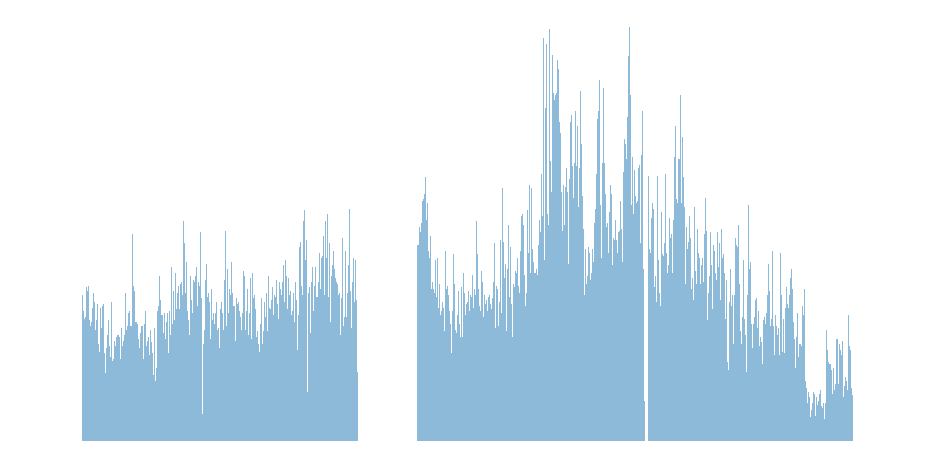

In [20]:
fig = plt.figure(figsize = [16,8])
plt.rcParams['font.size'] = 18
plt.rcParams['figure.facecolor'] = (0, 0, 0, 0)
plt.rcParams['axes.facecolor'] = (0,0,0,0)
plt.hist(df['date'], bins = pd.date_range('08JUL2005', '01JAN2022', freq = '1W'), color = 'tab:blue', alpha = 0.5)
plt.show()

In [28]:
h1 = np.histogram(df['date'].iloc[np.where(df['text'].apply(lambda x: 'door' in str(x)))], bins = pd.date_range('08JUL2005','01JAN2022', freq = '1M'))
h2 = np.histogram(df['date'].iloc[np.where(df['text'].apply(lambda x: 'track' in str(x)))], bins = pd.date_range('08JUL2005','01JAN2022',freq = '1M'))

/tmp/ipykernel_629394/877286673.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.step(h1[1][:-1], h1[0]/h2[0], lw = 2., c = 'tab:blue', alpha = 0.7)


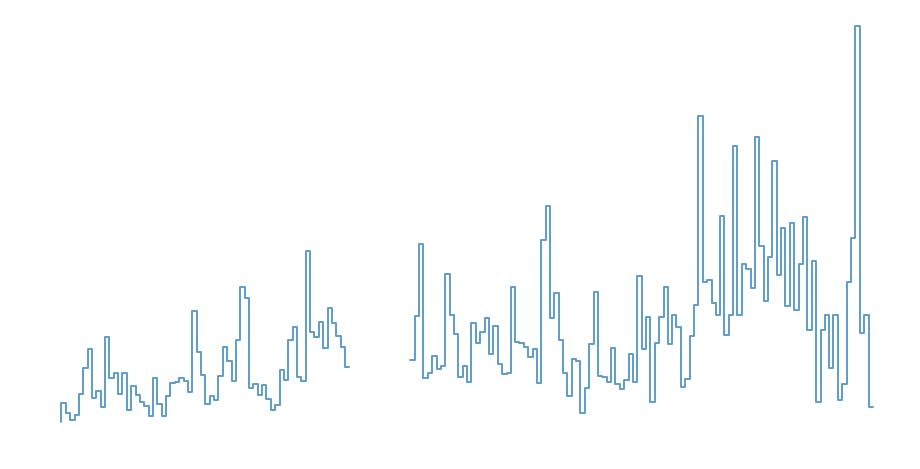

In [29]:
fig = plt.figure(figsize = [16,8])
plt.step(h1[1][:-1], h1[0]/h2[0], lw = 2., c = 'tab:blue', alpha = 0.7)
plt.show()


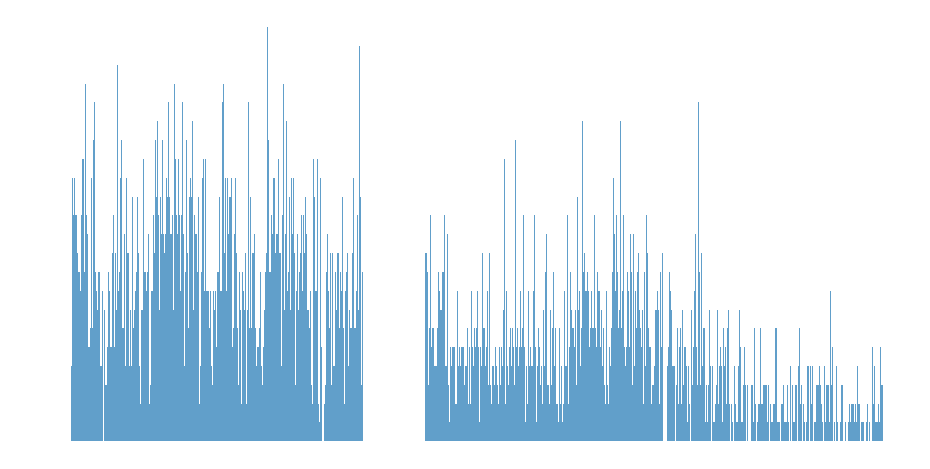

In [31]:
fig = plt.figure(figsize = [16,8])

plt.hist(df['date'].iloc[np.where(df['text'].apply(lambda x: 'track' in str(x)))], bins = pd.date_range('08JUL2005','01MAR2021', freq = '1W'),
         color = 'tab:blue', alpha = 0.7)
#plt.axvline(pd.to_datetime('30NOV2016'), c = 'r', ls = '--')
plt.show()

In [67]:
categories = ['door','polic','track','brake','signal','maintenance','equipment','mechanical','medical']
for category in categories:
    df[category] = df['text'].apply(lambda x: category in str(x))
df['other'] = [not any(df[categories].iloc[i]) for i in range(len(df))]

In [66]:
df.iloc[np.where(df['other'])[0][-2]]['text']

'A Branch Avenue-bound Green Line train at Congress Heights was\ndelayed 8 minutes due to a medical emergency.\n</p>\n'

In [68]:
np.sum(df['other']*1.)/len(df)

0.4005874515503876

In [75]:
h[0]

array([ 2, 19, 11,  8,  8,  3, 11,  9, 11, 11, 14, 10, 11, 16,  6, 18,  9,
        3,  2, 10,  5, 13, 12, 11,  9,  8,  5, 15, 13, 12,  9, 11,  3, 11,
       11, 11, 12,  7, 13,  6, 10,  7, 14, 13,  5, 15, 14, 15, 17, 14, 11,
       15, 16, 27, 12, 12, 15,  9, 17, 17, 15, 11, 11, 19, 12,  9, 15, 15,
        7,  9, 12,  9, 16, 13, 11,  7,  4,  7,  5,  4, 15, 18, 19, 19, 15,
       14, 11, 13, 11, 15, 19,  9,  5, 15,  7, 17,  9, 14, 10, 17, 19, 19,
       15, 15, 16, 18, 13, 14,  8, 13, 14,  8,  7, 15,  8, 16, 11,  9, 20,
       20, 27, 21, 11, 20, 19, 25, 15, 16,  2, 12, 10, 17, 19, 22, 11, 13,
       10, 23, 16, 13, 13, 15, 24, 10, 15, 19, 11, 12, 16, 17, 15, 19, 26,
        9, 15, 17, 12, 11, 13, 23,  7, 16,  6, 10, 10, 13, 15, 16, 10, 14,
       12, 21, 11, 12, 12, 19, 14, 14, 24, 14, 19, 12, 21, 30, 25, 15, 19,
       20, 16, 15, 21, 12, 18, 25, 21, 26, 16, 11, 18, 17, 11, 18, 16, 14,
       15, 19, 14, 14, 15, 23, 14, 10, 22, 10, 13, 10, 16,  4, 10, 13,  8,
        5, 13, 14, 22, 15

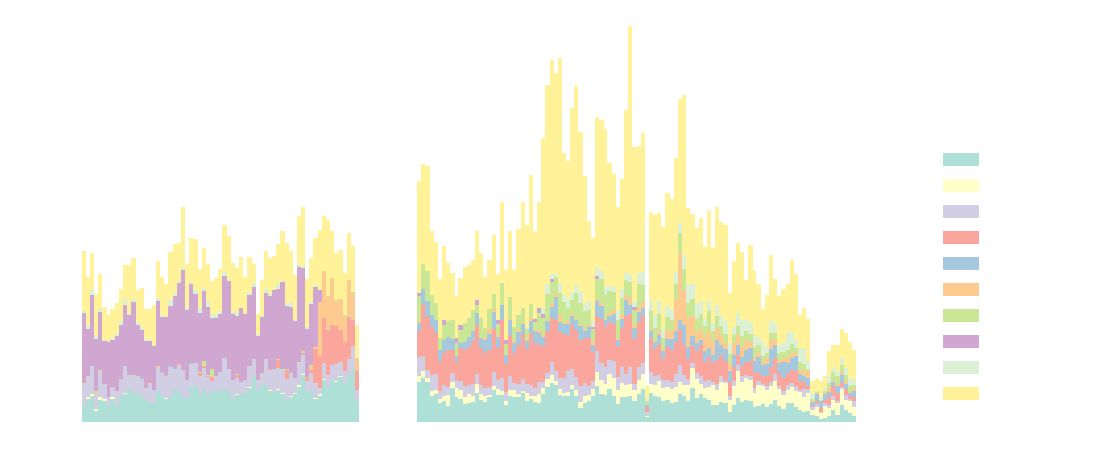

In [84]:
fig  = plt.figure(figsize = [16,8])
h_old = np.zeros((197))
for category in categories+['other']:
    h = np.histogram(df.iloc[np.where(df[category])]['date'], bins = pd.date_range('08JUL2005','01JAN2022', freq = '1M'))
    plt.fill_between(h[1][:-1], h_old, h_old+h[0], label = category, alpha = 0.7, step = 'post')
    h_old += h[0]
plt.legend(bbox_to_anchor = [1.2, 0.7])
plt.show()

In [41]:
df.iloc[-33]['text']

'A Glenmont-bound Red Line train at Takoma was delayed 5 minutes\ndue to a signal problem.\n</p>\n'

In [ ]:
# TO DO 
# fix bugs pre-2009 Done!
# Scrape post-2015 ish
# Add in problematic entries
# Parse for location
# Parse for direction
# Parse for 'X problem'

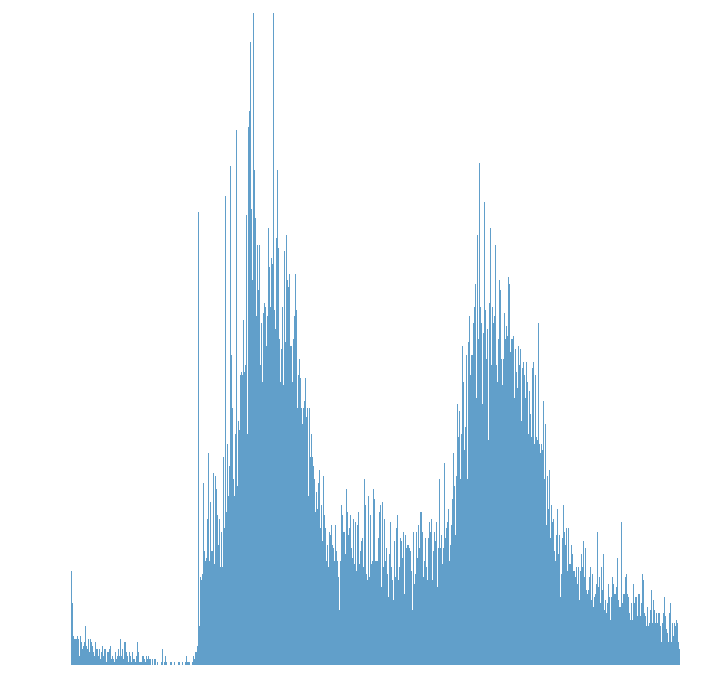

In [25]:
fig = plt.figure(figsize = [12,12])
plt.hist(df['date'].apply(lambda x: x.hour)*60 + df['date'].apply(lambda x: x.minute), bins = np.arange(1440),
         color = 'tab:blue', alpha = 0.7)
plt.ylim([0, 200])
plt.show()

In [80]:
df = pd.DataFrame(columns = ['date','text'])
i = 0
for entry in soup.find(class_ = 'cs_control CS_Element_CustomCF').decode_contents().split('<p>'):
    if ':' in entry and np.logical_or('a.m.' in entry, 'p.m' in entry):
        event_date = date + pd.to_datetime()
        event_text = entry.strip('\n')
        df.loc[i] = [event_date, event_text]
        i += 1
    if 'day,'  in entry:
        date = pd.to_datetime(entry.split('<h3>')[1].strip('</h3>\n'))


,date,text
0,2009-06-22,9:13 a.m. A Red Line train at Gallery Pl-China...
1,2009-06-22,1:43 p.m. A Blue Line train at Capitol South i...
2,2009-06-22,2:10 p.m. A Yellow Line train at Crystal City ...
3,2009-06-22,3:13 p.m. A Blue Line train at Pentagon City i...
4,2009-06-22,3:57 p.m. A Red Line train at Tenleytown-AU in...
5,2009-06-22,4:35 p.m. An Orange Line train at Foggy Bottom...
6,2009-06-22,4:58 p.m. A Red Line train approaching Fort To...
7,2009-06-22,5:40 p.m. An Orange Line train at Ballston in ...
8,2009-06-22,5:52 p.m. A Blue Line train at Smithsonian in ...
9,2009-06-22,8:39 p.m. A Yellow Line train at King Street i...


In [75]:
for entry in soup.find(class_ = 'cs_control CS_Element_CustomCF').decode_contents().split('<p>'):
    if ':' in entry and np.logical_or('a.m.' in entry, 'p.m' in entry):
        event_date = date
        event_text = entry.strip('\n')
    if 'day,'  in entry:
        date = pd.to_datetime(entry.split('<h3>')[1].strip('</h3>\n'))

# Daylight Savings Time

In [263]:
from astral import LocationInfo
import datetime
from astral.sun import sun
from astral.geocoder import database, lookup
from matplotlib.colors import LinearSegmentedColormap

colors = ["royalblue", "orange"] # Change to your colors of choice
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)


In [336]:
def dst_matrices(city):
    m_no_dst = np.zeros((365, 1440))
    m_yes_dst = np.zeros((365, 1440))
    m_perm_dst = np.zeros((365, 1440))

    a = np.arange(0, 1440)
    for i,d in enumerate(pd.date_range('01JAN2022', '31DEC2022', freq = '1D')):
        s = sun(city.observer, date=d, tzinfo = city.timezone)
        sunrise_minutes = 60*s['sunrise'].hour + s['sunrise'].minute
        if s['sunset'].day > s['sunrise'].day:
            sunset_minutes = 60*s['sunset'].hour + s['sunset'].minute + 1440
        else:
            sunset_minutes = 60*s['sunset'].hour + s['sunset'].minute
        m_yes_dst[i] = 1.*np.logical_and(a>sunrise_minutes, a<sunset_minutes)

        if city.timezone == 'US/Eastern':
            offset = 5
        elif city.timezone == 'US/Central':
            offset = 6
        elif city.timezone == 'US/Mountain':
            offset = 7
        elif city.timezone == 'US/Pacific':
            offset = 8

        s = sun(city.observer, date=d, tzinfo = 'UTC')
        sunrise_minutes = 60*s['sunrise'].hour + s['sunrise'].minute - offset*60
        if s['sunset'].day+31*s['sunset'].month > s['sunrise'].day+31*s['sunrise'].month:
            sunset_minutes = 60*s['sunset'].hour + s['sunset'].minute + 1440 - offset*60
        else:
            sunset_minutes = 60*s['sunset'].hour + s['sunset'].minute - offset*60
        m_no_dst[i] = 1.*np.logical_and(a>sunrise_minutes, a<sunset_minutes)

        sunrise_minutes = 60*s['sunrise'].hour + s['sunrise'].minute - (offset-1)*60
        if s['sunset'].day+31*s['sunset'].month > s['sunrise'].day+31*s['sunrise'].month:
            sunset_minutes = 60*s['sunset'].hour + s['sunset'].minute + 1440 - (offset-1)*60
        else:
            sunset_minutes = 60*s['sunset'].hour + s['sunset'].minute - (offset-1)*60
        m_perm_dst[i] = 1.*np.logical_and(a>sunrise_minutes, a<sunset_minutes)
    return m_no_dst,m_yes_dst,m_perm_dst

def plot_dst(city, hgrid = True):
    plt.rcParams['font.size'] = 14
    fig = plt.figure(figsize = [25,10])
    plt.suptitle(city.name)
    m_no_dst,m_yes_dst,m_perm_dst = dst_matrices(city)

    plt.subplot(131)
    plt.imshow(m_yes_dst, aspect = 5, cmap = cmap1)
    plt.title('Standard DST')
    plt.xticks(np.array([0, 240, 480, 720, 960, 1200]),
                ['12AM','4AM','8AM','12PM','4PM','8PM'])
    plt.yticks(np.array([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]),
                ['January','February','March','April','May','June','July','August','September','October','November','December'])
    plt.axvline(480, ls = '--', c = 'k', lw = 2.)
    plt.axvline(1200, ls = '--', c = 'k', lw = 2.)

    if hgrid:
        plt.axhline(31, ls = '--', c = 'k', lw = 1.)
        plt.axhline(59, ls = '--', c = 'k', lw = 1.)
        plt.axhline(90, ls = '--', c = 'k', lw = 1.)
        plt.axhline(120, ls = '--', c = 'k', lw = 1.)
        plt.axhline(151, ls = '--', c = 'k', lw = 1.)
        plt.axhline(181, ls = '--', c = 'k', lw = 1.)
        plt.axhline(212, ls = '--', c = 'k', lw = 1.)
        plt.axhline(243, ls = '--', c = 'k', lw = 1.)
        plt.axhline(273, ls = '--', c = 'k', lw = 1.)
        plt.axhline(304, ls = '--', c = 'k', lw = 1.)
        plt.axhline(334, ls = '--', c = 'k', lw = 1.)

    plt.subplot(132)
    plt.title('No DST')
    plt.imshow(m_no_dst, aspect = 5, cmap = cmap1)
    plt.xticks(np.array([0, 240, 480, 720, 960, 1200]),
                ['12AM','4AM','8AM','12PM','4PM','8PM'])
    plt.axvline(480, ls = '--', c = 'k', lw = 2.)
    plt.axvline(1200, ls = '--', c = 'k', lw = 2.)
    plt.yticks([], [])
    if hgrid:
        plt.axhline(31, ls = '--', c = 'k', lw = 1.)
        plt.axhline(59, ls = '--', c = 'k', lw = 1.)
        plt.axhline(90, ls = '--', c = 'k', lw = 1.)
        plt.axhline(120, ls = '--', c = 'k', lw = 1.)
        plt.axhline(151, ls = '--', c = 'k', lw = 1.)
        plt.axhline(181, ls = '--', c = 'k', lw = 1.)
        plt.axhline(212, ls = '--', c = 'k', lw = 1.)
        plt.axhline(243, ls = '--', c = 'k', lw = 1.)
        plt.axhline(273, ls = '--', c = 'k', lw = 1.)
        plt.axhline(304, ls = '--', c = 'k', lw = 1.)
        plt.axhline(334, ls = '--', c = 'k', lw = 1.)

    plt.subplot(133)
    plt.title('Permanent DST')
    plt.imshow(m_perm_dst, aspect = 5, cmap = cmap1)
    plt.yticks([], [])

    plt.xticks(np.array([0, 240, 480, 720, 960, 1200]),
                ['12AM','4AM','8AM','12PM','4PM','8PM'])
    if hgrid:
        plt.axvline(480, ls = '--', c = 'k', lw = 2.)
        plt.axvline(1200, ls = '--', c = 'k', lw = 2.)
        plt.axhline(31, ls = '--', c = 'k', lw = 1.)
        plt.axhline(59, ls = '--', c = 'k', lw = 1.)
        plt.axhline(90, ls = '--', c = 'k', lw = 1.)
        plt.axhline(120, ls = '--', c = 'k', lw = 1.)
        plt.axhline(151, ls = '--', c = 'k', lw = 1.)
        plt.axhline(181, ls = '--', c = 'k', lw = 1.)
        plt.axhline(212, ls = '--', c = 'k', lw = 1.)
        plt.axhline(243, ls = '--', c = 'k', lw = 1.)
        plt.axhline(273, ls = '--', c = 'k', lw = 1.)
        plt.axhline(304, ls = '--', c = 'k', lw = 1.)
        plt.axhline(334, ls = '--', c = 'k', lw = 1.)

    plt.subplots_adjust(wspace = -0.05)
    plt.savefig('dst.pdf', bbox_inches = 'tight')
    plt.show()

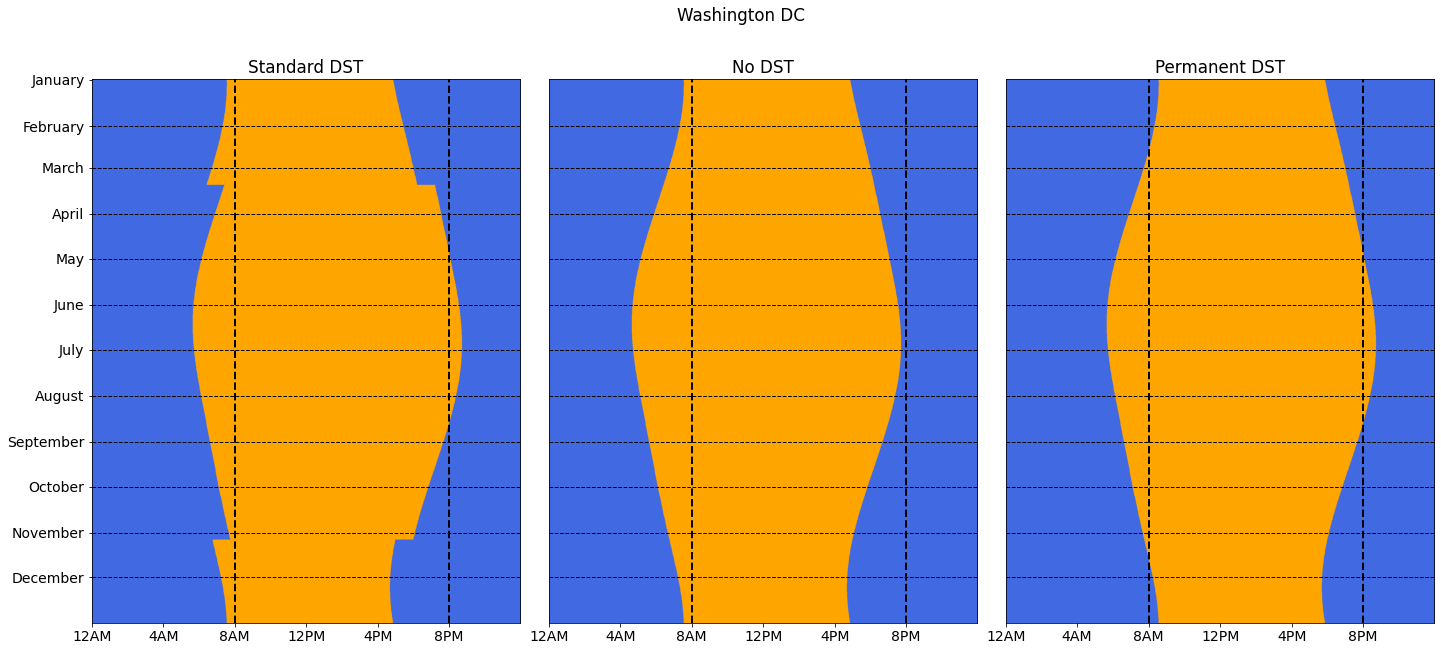

In [345]:
plot_dst(lookup("Washington DC", database()))


In [371]:
city = lookup("San Francisco", database())

In [349]:
date.today().year

2022

In [5]:
sun(city.observer, date = datetime.date(2022,1,31), tzinfo = 'UTC')

{'dawn': datetime.datetime(2022, 1, 31, 11, 49, 22, 556575, tzinfo=<UTC>),
 'sunrise': datetime.datetime(2022, 1, 31, 12, 18, 50, 345789, tzinfo=<UTC>),
 'noon': datetime.datetime(2022, 1, 31, 17, 21, 30, tzinfo=<UTC>),
 'sunset': datetime.datetime(2022, 1, 31, 22, 24, 49, 537668, tzinfo=<UTC>),
 'dusk': datetime.datetime(2022, 1, 31, 22, 54, 18, 528381, tzinfo=<UTC>)}

In [362]:
def datetime_to_unix(timestamp):
    return (timestamp - pd.Timestamp('1970-01-01', tz = 'UTC'))/ pd.Timedelta('1s')

def daterange_to_unix(drange):
    return (drange - pd.Timestamp("1970-01-01", tz = 'UTC')) / pd.Timedelta('1s')


In [380]:
year = '2022'

jan1 = pd.to_datetime(date(int(year)-1,12,30), utc = None)
dec31 = pd.to_datetime(date(int(year)+1,1,2), utc = None)
drange = pd.date_range(jan1, dec31, freq = '60s', tz = city.timezone)[:-1]
jan1_idx2_tz = np.argmin(np.abs([drange - pd.Timestamp('01JAN2022', tz = city.timezone)]))
dec31_idx2_tz = np.argmin(np.abs([drange - pd.Timestamp('01JAN2023', tz = city.timezone)]))
offset = (drange[0].utcoffset().days*86400 + drange[0].utcoffset().seconds)/60. # in minutes

# A year plus 2 days on either side to account for any edge cases
pre_jan1 = pd.to_datetime(date(int(year)-1,12,30), utc = True)
post_dec31 = pd.to_datetime(date(int(year)+1,1,2), utc = True)
jan1_idx_unix = np.argmin(np.abs([a - datetime_to_unix(pd.Timestamp('01JAN2022', tz = city.timezone))]))
dec31_idx_unix = np.argmin(np.abs([a - datetime_to_unix(pd.Timestamp('01JAN2023', tz = city.timezone))]))
extended_drange = pd.date_range(pre_jan1, post_dec31, freq = '1D', tz = 'UTC')

# A mapping from unix seconds to time of day
# This could probably (definitely) be cleaned up some...
dst_minutes = np.array(drange.hour*60+drange.minute)
extended_drange_s = pd.date_range(pre_jan1, post_dec31, freq = '60s', tz = 'UTC')[:-1]
ext_dst_minutes = np.array((extended_drange_s).hour*60+(extended_drange_s).minute)
transformed = (2*ext_dst_minutes - dst_minutes)%1440

M = np.zeros((3, (len(extended_drange)-1) * 1440)) # Unraveled, we'll ravel it later
a = daterange_to_unix(pd.date_range(pre_jan1, post_dec31, freq = '60S', tz = 'UTC'))[:-1]

for d in tqdm(extended_drange[:-1]):
    s = sun(city.observer, date = d, tzinfo = city.timezone)
    
    beginning = np.argmin(np.abs(daterange_to_unix(drange) - datetime_to_unix(d))) - int(offset)
    end = np.argmin(np.abs(daterange_to_unix(drange) - datetime_to_unix(d) - 86400)) - int(offset)
    daylight_local = np.where(np.logical_and(drange[beginning:end]>s['sunrise'], drange[beginning:end]<s['sunset']))
    M[0][np.arange(beginning, end, 1)[np.argsort(transformed[beginning:end])][daylight_local[0]]] = 1.
    
    sunrise = datetime_to_unix(s['sunrise'])
    sunset = datetime_to_unix(s['sunset'])

    daylight_unix = np.where(np.logical_and(a>sunrise, a<sunset))
    M[1, daylight_unix] = 1.

M = np.array([M[0][jan1_idx2_tz:dec31_idx2_tz].reshape(365, 1440),
              M[1][jan1_idx_unix:dec31_idx_unix].reshape(365, 1440),
             M[1][jan1_idx_unix-60:dec31_idx_unix-60].reshape(365, 1440)])
          


100%|███████████████████████████████████████████████████████████████████| 368/368 [00:08<00:00, 42.15it/s]


In [376]:

M = np.array([M[0][jan1_idx2_tz:dec31_idx2_tz].reshape(365, 1440),
              M[1][jan1_idx_unix:dec31_idx_unix].reshape(365, 1440),
             M[2][jan1_idx_unix:dec31_idx_unix].reshape(365, 1440)])
          

In [ ]:
len(M[2])

In [307]:
s['sunrise']

datetime.datetime(2022, 1, 8, 7, 31, 42, 780050, tzinfo=<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD>)

In [303]:
datetime_to_unix(d)

1641600000.0

In [304]:
daterange_to_unix(drange)

Float64Index([1640840400.0, 1640840460.0, 1640840520.0, 1640840580.0,
              1640840640.0, 1640840700.0, 1640840760.0, 1640840820.0,
              1640840880.0, 1640840940.0,
              ...
              1672635000.0, 1672635060.0, 1672635120.0, 1672635180.0,
              1672635240.0, 1672635300.0, 1672635360.0, 1672635420.0,
              1672635480.0, 1672635540.0],
             dtype='float64', length=529920)

In [318]:
drange[beginning].utcoffset().days*86400 + drange[beginning].utcoffset().seconds

-18000

In [314]:
86400-68400

18000

In [342]:
date(2022, 4, 1).timetuple().tm_yday

AttributeError: 'datetime.date' object has no attribute 'tm_yday'

In [306]:
drange[end]

Timestamp('2022-01-08 19:00:00-0500', tz='US/Eastern', freq='60S')

In [291]:
extended_drange_s[beginning]

Timestamp('2022-01-07 19:00:00+0000', tz='UTC', freq='60S')

In [292]:
extended_drange_s[end]

Timestamp('2022-01-08 19:00:00+0000', tz='UTC', freq='60S')

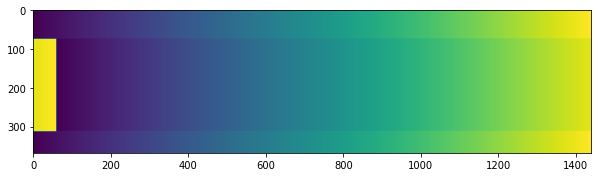

In [255]:
fig = plt.figure(figsize =[10,5])
dst_minutes = np.array((drange).hour*60+(drange).minute)
extended_drange = pd.date_range(pre_jan1, post_dec31, freq = '60s', tz = 'UTC')[:-1]
ext_dst_minutes = np.array((extended_drange).hour*60+(extended_drange).minute)
transform = (dst_minutes.reshape(368, 1440) - ext_dst_minutes.reshape(368, 1440))
transformed = (dst_minutes.reshape(368, 1440) - 2*transform)%1440
plt.imshow(transformed, vmin = 0, vmax = 1440, cmap = 'viridis')
# Limit the transformation

In [241]:
np.max(transformed)

1499

In [164]:
np.argsort(dst_minutes[beginning:end])[-50:]

array([250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
       263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,
       276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288,
       289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299])

In [171]:
M[0][(np.arange(beginning, end, 1))] = 1

In [142]:
np.arange(beginning, end, 1)[np.argsort(dst_minutes[beginning:end])]

array([5760, 5761, 5762, ..., 5757, 5758, 5759])

In [143]:
np.arange(beginning, end, 1)

array([5460, 5461, 5462, ..., 6897, 6898, 6899])

In [17]:
midnight_jan1_idx = np.argmin(np.abs([a - datetime_to_unix(pd.Timestamp('01JAN2022', tz = city.timezone))]))
midnight_dec31_idx = np.argmin(np.abs([a - datetime_to_unix(pd.Timestamp('01JAN2023', tz = city.timezone))]))

In [22]:
np.sum(a[midnight_jan1_idx:midnight_dec31_idx] - unix_drange)

0.0

In [611]:
M[1][midnight_jan1_idx:midnight_dec31_idx].shape[0]/1440

365.0

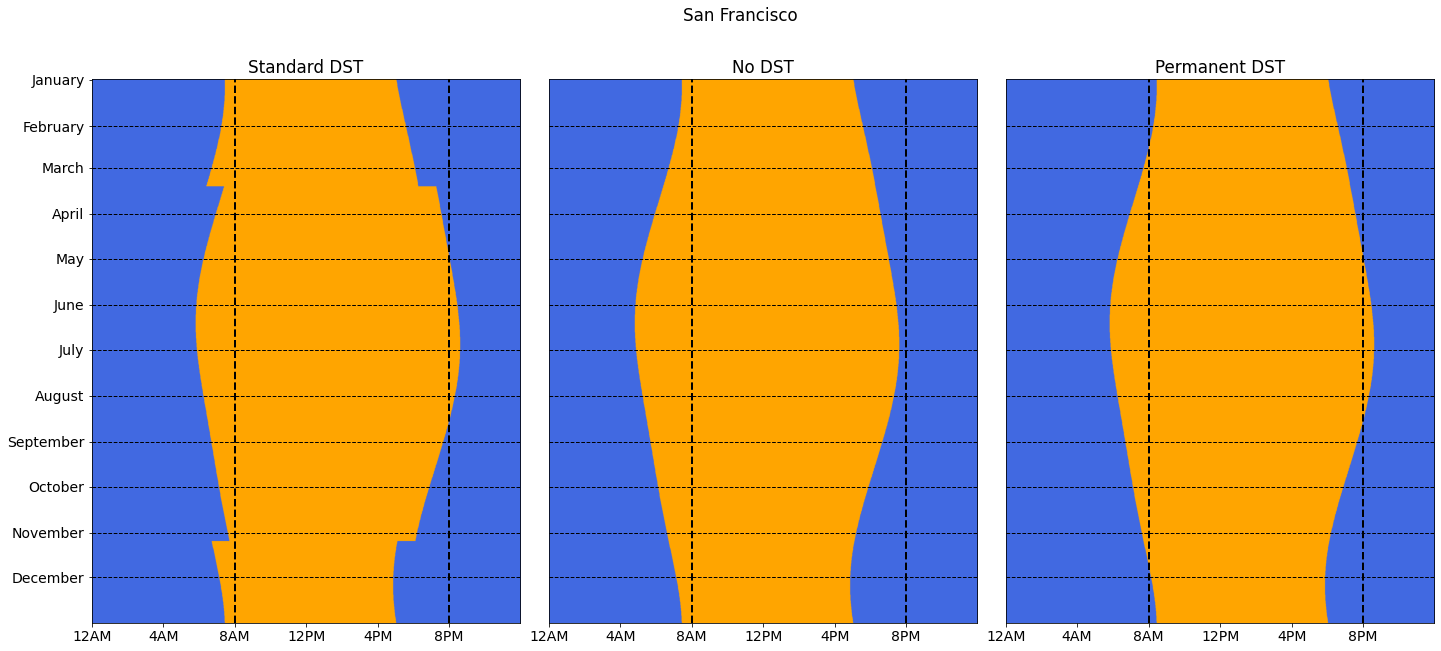

In [381]:
hgrid = True
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize = [25,10])
plt.suptitle(city.name)

plt.subplot(131)
plt.imshow(M[0], aspect = 5, cmap = cmap1)
plt.title('Standard DST')
plt.xticks(np.array([0, 240, 480, 720, 960, 1200]),
            ['12AM','4AM','8AM','12PM','4PM','8PM'])
plt.yticks(np.array([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]),
            ['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.axvline(480, ls = '--', c = 'k', lw = 2.)
plt.axvline(1200, ls = '--', c = 'k', lw = 2.)

if hgrid:
    plt.axhline(31, ls = '--', c = 'k', lw = 1.)
    plt.axhline(59, ls = '--', c = 'k', lw = 1.)
    plt.axhline(90, ls = '--', c = 'k', lw = 1.)
    plt.axhline(120, ls = '--', c = 'k', lw = 1.)
    plt.axhline(151, ls = '--', c = 'k', lw = 1.)
    plt.axhline(181, ls = '--', c = 'k', lw = 1.)
    plt.axhline(212, ls = '--', c = 'k', lw = 1.)
    plt.axhline(243, ls = '--', c = 'k', lw = 1.)
    plt.axhline(273, ls = '--', c = 'k', lw = 1.)
    plt.axhline(304, ls = '--', c = 'k', lw = 1.)
    plt.axhline(334, ls = '--', c = 'k', lw = 1.)

plt.subplot(132)
plt.title('No DST')
plt.imshow(M[1], aspect = 5, cmap = cmap1)
plt.xticks(np.array([0, 240, 480, 720, 960, 1200]),
            ['12AM','4AM','8AM','12PM','4PM','8PM'])
plt.axvline(480, ls = '--', c = 'k', lw = 2.)
plt.axvline(1200, ls = '--', c = 'k', lw = 2.)
plt.yticks([], [])
if hgrid:
    plt.axhline(31, ls = '--', c = 'k', lw = 1.)
    plt.axhline(59, ls = '--', c = 'k', lw = 1.)
    plt.axhline(90, ls = '--', c = 'k', lw = 1.)
    plt.axhline(120, ls = '--', c = 'k', lw = 1.)
    plt.axhline(151, ls = '--', c = 'k', lw = 1.)
    plt.axhline(181, ls = '--', c = 'k', lw = 1.)
    plt.axhline(212, ls = '--', c = 'k', lw = 1.)
    plt.axhline(243, ls = '--', c = 'k', lw = 1.)
    plt.axhline(273, ls = '--', c = 'k', lw = 1.)
    plt.axhline(304, ls = '--', c = 'k', lw = 1.)
    plt.axhline(334, ls = '--', c = 'k', lw = 1.)

plt.subplot(133)
plt.title('Permanent DST')
plt.imshow(M[2], aspect = 5, cmap = cmap1)
plt.yticks([], [])

plt.xticks(np.array([0, 240, 480, 720, 960, 1200]),
            ['12AM','4AM','8AM','12PM','4PM','8PM'])
if hgrid:
    plt.axvline(480, ls = '--', c = 'k', lw = 2.)
    plt.axvline(1200, ls = '--', c = 'k', lw = 2.)
    plt.axhline(31, ls = '--', c = 'k', lw = 1.)
    plt.axhline(59, ls = '--', c = 'k', lw = 1.)
    plt.axhline(90, ls = '--', c = 'k', lw = 1.)
    plt.axhline(120, ls = '--', c = 'k', lw = 1.)
    plt.axhline(151, ls = '--', c = 'k', lw = 1.)
    plt.axhline(181, ls = '--', c = 'k', lw = 1.)
    plt.axhline(212, ls = '--', c = 'k', lw = 1.)
    plt.axhline(243, ls = '--', c = 'k', lw = 1.)
    plt.axhline(273, ls = '--', c = 'k', lw = 1.)
    plt.axhline(304, ls = '--', c = 'k', lw = 1.)
    plt.axhline(334, ls = '--', c = 'k', lw = 1.)

plt.subplots_adjust(wspace = -0.05)
plt.show()

In [350]:
def dst_matrices(city, year = '2022'):
    """
    A function that finds the sunset and rise over the course of a year
    at a particular location.

    Inputs:
    - city: an astral LocationInfo object defining the city location, timezone, etc.
    - year: the year of interest, as a string

    Outputs:
    - An array M containing the data. The values of M are 0 if the sun has set,
      and 1 if the sun has risen.
      Dimensions of M are: 3x365x1440
        - 3 scenarios (standard DST, no DST, permanent DST)
        - 365 days per year
        - 1440 minutes per day

    Notes:
    - Each lat/lon location on Earth will have its own unique M
    - Time of day is given in the local time zone
    """

    jan1 = pd.to_datetime(date(int(year)-1,12,30), utc = None)
    dec31 = pd.to_datetime(date(int(year)+1,1,2), utc = None)
    drange = pd.date_range(jan1, dec31, freq = '60s', tz = city.timezone)[:-1]
    jan1_idx2_tz = np.argmin(np.abs([drange - pd.Timestamp('01JAN2022', tz = city.timezone)]))
    dec31_idx2_tz = np.argmin(np.abs([drange - pd.Timestamp('01JAN2023', tz = city.timezone)]))
    offset = (drange[0].utcoffset().days*86400 + drange[0].utcoffset().seconds)/60. # in minutes

    # A year plus 2 days on either side to account for any edge cases
    pre_jan1 = pd.to_datetime(date(int(year)-1,12,30), utc = True)
    post_dec31 = pd.to_datetime(date(int(year)+1,1,2), utc = True)
    extended_drange = pd.date_range(pre_jan1, post_dec31, freq = '1D', tz = 'UTC')
    extended_drange_s = pd.date_range(pre_jan1, post_dec31, freq = '60s', tz = 'UTC')[:-1]
    a = daterange_to_unix(extended_drange_s)[:-1]

    jan1_idx_unix = np.argmin(np.abs([a - datetime_to_unix(pd.Timestamp('01JAN2022', tz = city.timezone))]))
    dec31_idx_unix = np.argmin(np.abs([a - datetime_to_unix(pd.Timestamp('01JAN2023', tz = city.timezone))]))

    # A mapping from unix seconds to time of day
    # This could probably (definitely) be cleaned up some...
    dst_minutes = np.array(drange.hour*60+drange.minute)
    ext_dst_minutes = np.array((extended_drange_s).hour*60+(extended_drange_s).minute)
    transformed = (2*ext_dst_minutes - dst_minutes)%1440

    M = np.zeros((3, (len(extended_drange)-1) * 1440)) # Unraveled, we'll ravel it later
    for d in tqdm(extended_drange):
        s = sun(city.observer, date = d, tzinfo = city.timezone)

        beginning = np.argmin(np.abs(daterange_to_unix(drange) - datetime_to_unix(d))) - int(offset)
        end = np.argmin(np.abs(daterange_to_unix(drange) - datetime_to_unix(d) - 86400)) - int(offset)
        daylight_local = np.where(np.logical_and(drange[beginning:end]>s['sunrise'], drange[beginning:end]<s['sunset']))
        M[0][np.arange(beginning, end, 1)[np.argsort(transformed[beginning:end])][daylight_local[0]]] = 1.

        sunrise = datetime_to_unix(s['sunrise'])
        sunset = datetime_to_unix(s['sunset'])

        daylight_unix = np.where(np.logical_and(a>sunrise, a<sunset))
        M[1, daylight_unix] = 1.
        M[2, daylight_unix[0]+60] = 1.

    M = np.array([M[0][jan1_idx2_tz:dec31_idx2_tz].reshape(365, 1440),
                  M[1][jan1_idx_unix:dec31_idx_unix].reshape(365, 1440),
                 M[2][jan1_idx_unix:dec31_idx_unix].reshape(365, 1440)])
    return M


In [353]:
!python ~/Projects/sandbox/daylight-savings-time/dst.py 'Washington DC'

  0%|                                         | 1/369 [00:10<1:05:49, 10.73s/it]^C



In [356]:
dst_matrices(city)

AttributeError: module 'datetime' has no attribute 'utcfromtimestamp'

In [355]:
def datetime_to_unix(dtime):
    timestamp = calendar.timegm(dtime.timetuple())
    return time.mktime(datetime.utcfromtimestamp(timestamp).timetuple())

def daterange_to_unix(drange):
    return np.array([datetime_to_unix(x) for x in drange])

def dst_matrices(city, year = '2022'):
    """
    A function that finds the sunset and rise over the course of a year
    at a particular location.

    Inputs:
    - city: an astral LocationInfo object defining the city location, timezone, etc.
    - year: the year of interest, as a string

    Outputs:
    - An array M containing the data. The values of M are 0 if the sun has set,
      and 1 if the sun has risen.
      Dimensions of M are: 3x365x1440
        - 3 scenarios (standard DST, no DST, permanent DST)
        - 365 days per year
        - 1440 minutes per day

    Notes:
    - Each lat/lon location on Earth will have its own unique M
    - Time of day is given in the local time zone
    """

    jan1 = pd.to_datetime(date(int(year)-1,12,30), utc = None)
    dec31 = pd.to_datetime(date(int(year)+1,1,2), utc = None)
    drange = pd.date_range(jan1, dec31, freq = '60s', tz = city.timezone)[:-1]
    jan1_idx2_tz = np.argmin(np.abs([drange - pd.Timestamp('01JAN2022', tz = city.timezone)]))
    dec31_idx2_tz = np.argmin(np.abs([drange - pd.Timestamp('01JAN2023', tz = city.timezone)]))
    offset = (drange[0].utcoffset().days*86400 + drange[0].utcoffset().seconds)/60. # in minutes

    # A year plus 2 days on either side to account for any edge cases
    pre_jan1 = pd.to_datetime(date(int(year)-1,12,30), utc = True)
    post_dec31 = pd.to_datetime(date(int(year)+1,1,2), utc = True)
    extended_drange = pd.date_range(pre_jan1, post_dec31, freq = '1D', tz = 'UTC')
    extended_drange_s = pd.date_range(pre_jan1, post_dec31, freq = '60s', tz = 'UTC')[:-1]
    a = daterange_to_unix(extended_drange_s)[:-1]

    jan1_idx_unix = np.argmin(np.abs([a - datetime_to_unix(pd.Timestamp('01JAN2022', tz = city.timezone))]))
    dec31_idx_unix = np.argmin(np.abs([a - datetime_to_unix(pd.Timestamp('01JAN2023', tz = city.timezone))]))

    # A mapping from unix seconds to time of day
    # This could probably (definitely) be cleaned up some...
    dst_minutes = np.array(drange.hour*60+drange.minute)
    ext_dst_minutes = np.array((extended_drange_s).hour*60+(extended_drange_s).minute)
    transformed = (2*ext_dst_minutes - dst_minutes)%1440

    M = np.zeros((3, (len(extended_drange)-1) * 1440)) # Unraveled, we'll ravel it later
    for d in tqdm(extended_drange):
        s = sun(city.observer, date = d, tzinfo = city.timezone)

        beginning = np.argmin(np.abs(daterange_to_unix(drange) - datetime_to_unix(d))) - int(offset)
        end = np.argmin(np.abs(daterange_to_unix(drange) - datetime_to_unix(d) - 86400)) - int(offset)
        daylight_local = np.where(np.logical_and(drange[beginning:end]>s['sunrise'], drange[beginning:end]<s['sunset']))
        M[0][np.arange(beginning, end, 1)[np.argsort(transformed[beginning:end])][daylight_local[0]]] = 1.

        sunrise = datetime_to_unix(s['sunrise'])
        sunset = datetime_to_unix(s['sunset'])

        daylight_unix = np.where(np.logical_and(a>sunrise, a<sunset))
        M[1, daylight_unix] = 1.
        M[2, daylight_unix[0]+60] = 1.

    M = np.array([M[0][jan1_idx2_tz:dec31_idx2_tz].reshape(365, 1440),
                  M[1][jan1_idx_unix:dec31_idx_unix].reshape(365, 1440),
                 M[2][jan1_idx_unix:dec31_idx_unix].reshape(365, 1440)])
    return M


In [359]:
date(2022, 0, 1).timetuple().tm_yday

ValueError: month must be in 1..12